In [2]:
import pandas as pd

from altair import Chart
from math import factorial
import random




$$ P(c_{r+1}) = \frac{ (n-1)!^2(r-1)!r! }{ (r+n-1)! } \sum_{k=1}^{r} \frac{1}{(k-1)!^2(n-k)!(r-k)!}$$

In [10]:
def collision_probability(r, n):
    def outer_denominator():
        return factorial(r + n - 1)
    
    def outer_numerator():
        return factorial(n-1)**2 * factorial(r-1) * factorial(r)

    def inner_denominator(k):
        return factorial(k - 1)**2 * factorial(n-k) * factorial(r-k)
    
    summation = sum([1.0 / inner_denominator(k) for k in range(1,r)])
    
    outer = float(outer_numerator())/outer_denominator()
    
    return outer * summation
        

In [11]:
def theoretical_collision_data(r, n):
    x = range(1, r)
    y = [collision_probability(a, n) for a in x]
    return x, y

In [12]:
number_insertions, probability = theoretical_collision_data(40, 50)
theoretical_collisions_frame = pd.DataFrame({"number_insertions": number_insertions, "probability": probability})

In [13]:
print theoretical_collisions_frame

    number_insertions  probability
0                   1     0.000000
1                   2     0.000784
2                   3     0.004480
3                   4     0.012554
4                   5     0.025596
5                   6     0.043313
6                   7     0.064703
7                   8     0.088366
8                   9     0.112823
9                  10     0.136792
10                 11     0.159354
11                 12     0.179996
12                 13     0.198572
13                 14     0.215199
14                 15     0.230142
15                 16     0.243723
16                 17     0.256245
17                 18     0.267963
18                 19     0.279067
19                 20     0.289692
20                 21     0.299927
21                 22     0.309828
22                 23     0.319432
23                 24     0.328762
24                 25     0.337836
25                 26     0.346666
26                 27     0.355263
27                 2

In [14]:
chart = Chart(theoretical_collisions_frame)

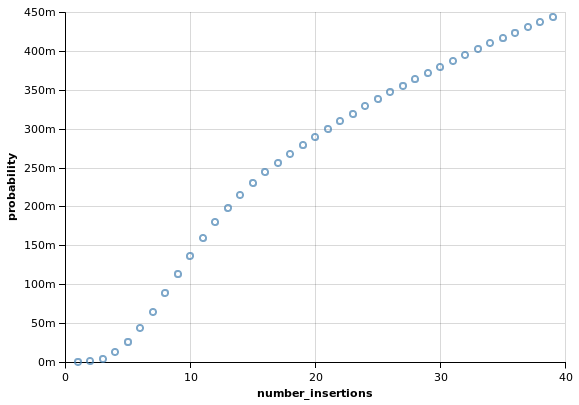

In [15]:
chart.mark_line().mark_point().encode(x='number_insertions', y='probability')

In order to confirm our formula, we test the number of collisions empirically.

In [16]:
class RandomHasher():
    """
    Pretends to uniformly insert into a hashtable for the purpose of counting collisions.
    """
    def __init__(self, size):
        self.cell_is_full = [False] * size # will be set to true if the "hash function" has picked this slot
        self.number_collisions = 0
    
    def insert_one(self):
        insert_position = random.randint(0, len(self.cell_is_full)-1)
        has_collided = self.cell_is_full[insert_position]
        self.cell_is_full[insert_position] = True
        if has_collided:
            self.number_collisions += 1
        return has_collided

In [17]:
def empirical_collision_data(num_insertions, table_size, population_size):
    # array to store how many collisions at each step (array of arrays) 
    collisions_at_step = [0] * (num_insertions - 1)
    
    for sample in range(population_size):
        hasher = RandomHasher(table_size)
        hasher.insert_one() #no collisions at step zero
        for step in range(num_insertions - 1):
            if hasher.insert_one():
                collisions_at_step[step] += 1
    
    x = range(1, num_insertions)
    y = [collisions / float(population_size) for collisions in collisions_at_step]
    return x, y
    

In [18]:
number_insertions, probability = empirical_collision_data(40, 50, 100000)

empirical_collisions_frame = pd.DataFrame({"number_insertions": number_insertions, "probability": probability})

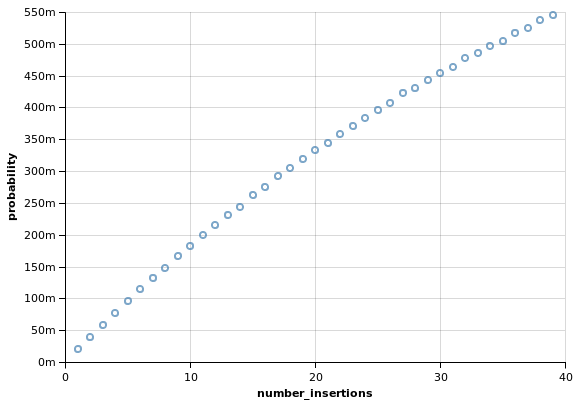

In [19]:
chart = Chart(empirical_collisions_frame)
chart.mark_line().mark_point().encode(x='number_insertions', y='probability')

In [20]:
theoretical_collisions_frame['Key'] = 'theoretical'
empirical_collisions_frame['Key'] = 'empirical'

compare_collisions = pd.concat([theoretical_collisions_frame, empirical_collisions_frame])

In [21]:


compare_collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 38
Data columns (total 3 columns):
number_insertions    78 non-null int64
probability          78 non-null float64
Key                  78 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


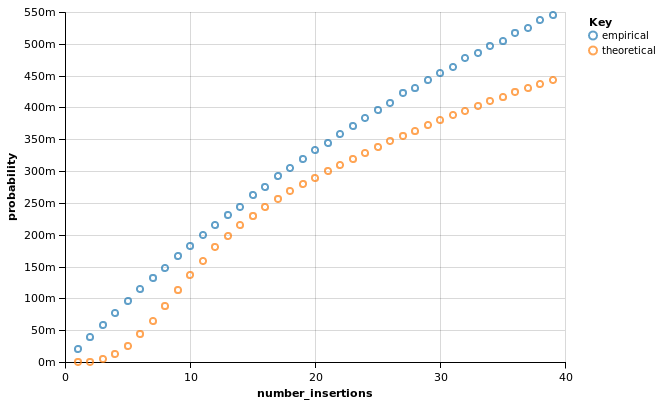

In [22]:
chart = Chart(compare_collisions)
chart.mark_line().mark_point().encode(x='number_insertions', y='probability', color='Key')